# Liquor Store Recommendations
#### _Importing NNecessary Libraries_

In [2]:
# EDA/Data Cleaning 
import numpy as np
import pandas as pd

# Modeling
import statsmodels.api as sm
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Setting style
plt.style.use('fivethirtyeight')
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

## Step 1: Loading the data and performing basic operations
#### _Loading the data in using Pandas¶_

In [3]:
df = pd.read_csv('./liquor.csv')

#### _Printing the first few rows of data_

In [4]:
df.head(10)

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,11/4/15,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,$4.50,$6.75,12,$81.00,9.00,2.38
1,3/2/16,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,$13.75,$20.63,2,$41.26,1.50,0.40
2,2/11/16,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,$12.59,$18.89,24,$453.36,24.00,6.34
3,2/3/16,2501,AMES,50010,85.0,Story,1071100.0,AMERICAN COCKTAILS,395,59154,1800 Ultimate Margarita,1750,$9.50,$14.25,6,$85.50,10.50,2.77
4,8/18/15,3654,BELMOND,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,297,35918,Five O'clock Vodka,1750,$7.20,$10.80,12,$129.60,21.00,5.55
5,4/20/15,2569,CEDAR RAPIDS,52402,57.0,Linn,1041100.0,AMERICAN DRY GINS,205,31473,New Amsterdam Gin,1750,$13.32,$19.98,6,$119.88,10.50,2.77
6,8/5/15,2596,OTTUMWA,52501,90.0,Wapello,1051010.0,AMERICAN GRAPE BRANDIES,85,52806,Korbel Brandy,750,$6.66,$9.99,3,$29.97,2.25,0.59
7,6/25/15,3456,CLEAR LAKE,50428,17.0,Cerro Gordo,1012100.0,CANADIAN WHISKIES,65,10628,Canadian Club Whisky,1750,$15.75,$23.63,2,$47.26,3.50,0.92
8,1/4/16,4757,BONDURANT,50035,77.0,Polk,1032080.0,IMPORTED VODKA,370,34006,Absolut Swedish Vodka 80 Prf,750,$11.49,$17.24,4,$68.96,3.00,0.79
9,11/10/15,4346,SHELLSBURG,52332,6.0,Benton,1081315.0,CINNAMON SCHNAPPS,65,82610,Dekuyper Hot Damn!,1000,$7.62,$11.43,2,$22.86,2.00,0.53


#### _Describing dataframes with column names, dataypes, null object count, and observation count_

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270955 entries, 0 to 270954
Data columns (total 18 columns):
Date                     270955 non-null object
Store Number             270955 non-null int64
City                     270955 non-null object
Zip Code                 270955 non-null object
County Number            269878 non-null float64
County                   269878 non-null object
Category                 270887 non-null float64
Category Name            270323 non-null object
Vendor Number            270955 non-null int64
Item Number              270955 non-null int64
Item Description         270955 non-null object
Bottle Volume (ml)       270955 non-null int64
State Bottle Cost        270955 non-null object
State Bottle Retail      270955 non-null object
Bottles Sold             270955 non-null int64
Sale (Dollars)           270955 non-null object
Volume Sold (Liters)     270955 non-null float64
Volume Sold (Gallons)    270955 non-null float64
dtypes: float64(4), int64(

#### _Dropping null and duplcate values_

In [6]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

#### _Converting datatypes_

In [7]:
# Removing symbols and converting numeric columns to floats
# Creating function to assist in doing so 

def string_to_float(money_str):
    return float(money_str.replace('$','').replace(',','').replace('-',''))

# Applying function 
df['Sale (Dollars)'] = df['Sale (Dollars)'].apply(string_to_float)
df['State Bottle Cost'] = df['State Bottle Cost'].apply(string_to_float)
df['State Bottle Retail'] = df['State Bottle Retail'].apply(string_to_float)

In [8]:
# Converting Store Number to str to interpret as categorical data

df['Store Number'] = df['Store Number'].astype(str)

In [9]:
# Converting date to datetime object
df['Date'] = pd.to_datetime(df['Date'])

# Adding columns for month and year by accessing datetime object
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

#### _Cleaning Data_
- Removing unnecessary or duplicated information

In [10]:
df.drop(['County Number','Category','Category Name','Vendor Number',
         'Item Number','Item Description','Volume Sold (Gallons)'],axis=1,inplace=True)

In [11]:
df.head(2)    # Inspecting progress

,Date,Store Number,City,Zip Code,County,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Month,Year
0,2015-11-04,3717,SUMNER,50674,Bremer,750,4.50,6.75,12,81.00,9.0,11,2015
1,2016-03-02,2614,DAVENPORT,52807,Scott,750,13.75,20.63,2,41.26,1.5,3,2016


## Step 2: Exploratory Data Analysis
#### Investigating Distributions
- Box plots depict numerical data through their quartiles and can indicate variability through the presence of outliers. Additionally, the spacings reveal the degree of dispersion and skewness of the data. 
- Below, the box plot shows that the Sales data is heavily skewed, with most stores only annually earning ~ $10,000, and the presence of several outlier stores represented as dots beyond the graph's whisker.  


Text(0.5,0,'Sale ($)')

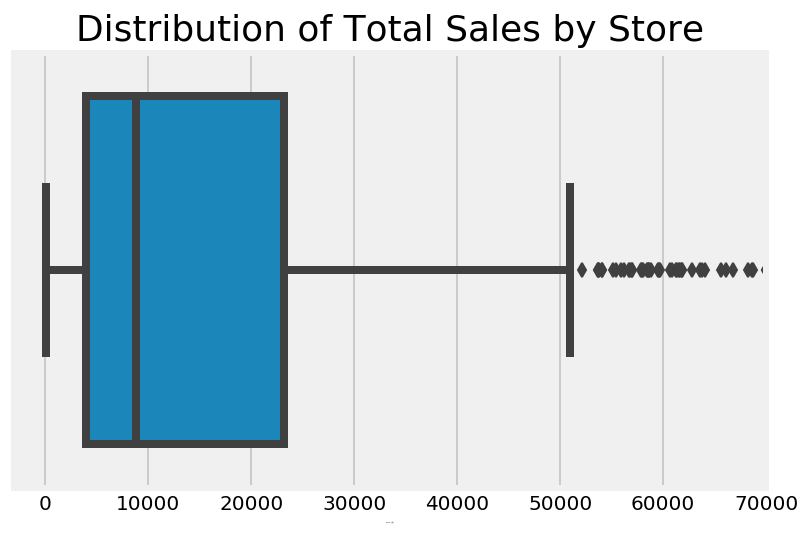

In [12]:
sns.boxplot(df.groupby('Store Number')['Sale (Dollars)'].sum());
plt.xlim(-3000,70000);
plt.title('Distribution of Total Sales by Store',fontsize=18)
plt.xlabel('Sale ($)',fontsize=1)

#### _Investigating Categorical Location Columns and Selecting Location Indicator_
- Because the scope of this analysis deals directly with location data, it is crucial to determinne which feature will be most benefical to use in model building.
- Value counts below reveal highly diversified features. To aid the model building process, it will be beneficail to narrow the scope of the data by selecting the least varied location indicator 

In [13]:
print('In the dataset there are:')
print('============================')
print(len(df['Zip Code'].value_counts()), 'Unique Zip Codes')
print(len(df['County'].value_counts()), 'Unique Counties')
print(len(df['City'].value_counts()), 'Unique Cities')
print(len(df["Store Number"].value_counts()), 'Unique Stores')

In the dataset there are:
412 Unique Zip Codes
99 Unique Counties
382 Unique Cities
1378 Unique Stores


- With 99 unique values - County - is the location column that is the least varied. 
- Aggregate functions can be utilzied to group data together on the Counnty column, shown below: 

In [14]:
# Creating dictionaries for each feature choosing appropriate agg function 

aggs = {'Bottle Volume (ml)':'mean',
        'State Bottle Cost':'mean',
        'State Bottle Retail':'mean',
        'Bottles Sold':'sum',
        'Sale (Dollars)':'sum',
        'Volume Sold (Liters)':'sum',
        'Store Number':'count'}

# Group aggregate functions on County column
aggs = df.groupby('County').agg(aggs)

# Sorting values in descending values by Sales to inspect highest performing counties 
aggs.sort_values('Sale (Dollars)',ascending=False)

,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Store Number
County,,,,,,,
Polk,879.307516,10.125470,15.203342,579515,7.745493e+06,502285.97,48934
Linn,868.288418,9.478968,14.233061,245741,3.139594e+06,219137.92,23459
Scott,869.044684,9.615335,14.437356,204885,2.457029e+06,162290.15,16628
Johnson,892.648181,10.241522,15.377705,147638,2.077858e+06,129627.87,13163
Black Hawk,856.633943,9.350094,14.040122,172391,1.924159e+06,131429.99,15025
Pottawattamie,889.712195,9.422282,14.146129,95250,1.277218e+06,85758.44,9086
Woodbury,910.604730,9.879488,14.831675,94865,1.249514e+06,84348.74,8541
Dubuque,962.188187,10.029943,15.062559,79563,1.076207e+06,78991.10,7737
Story,928.232275,10.246090,15.386307,76780,1.073358e+06,74441.66,8942


#### _Investigating Feature Distributions and Correlations_
- Joint plots are a useful tool to check for correlation between variables, as well as identify individual distributions.  
- Below, the joint plots reveal positive correlation between each feature and Sales, unsurprisingly enough (selling more bottles will result in higher sales, selling more volume of liquoe will result in higherr sales, etc). Additiomally, the heavily skewed distribution for Sales is further exemplofied. 

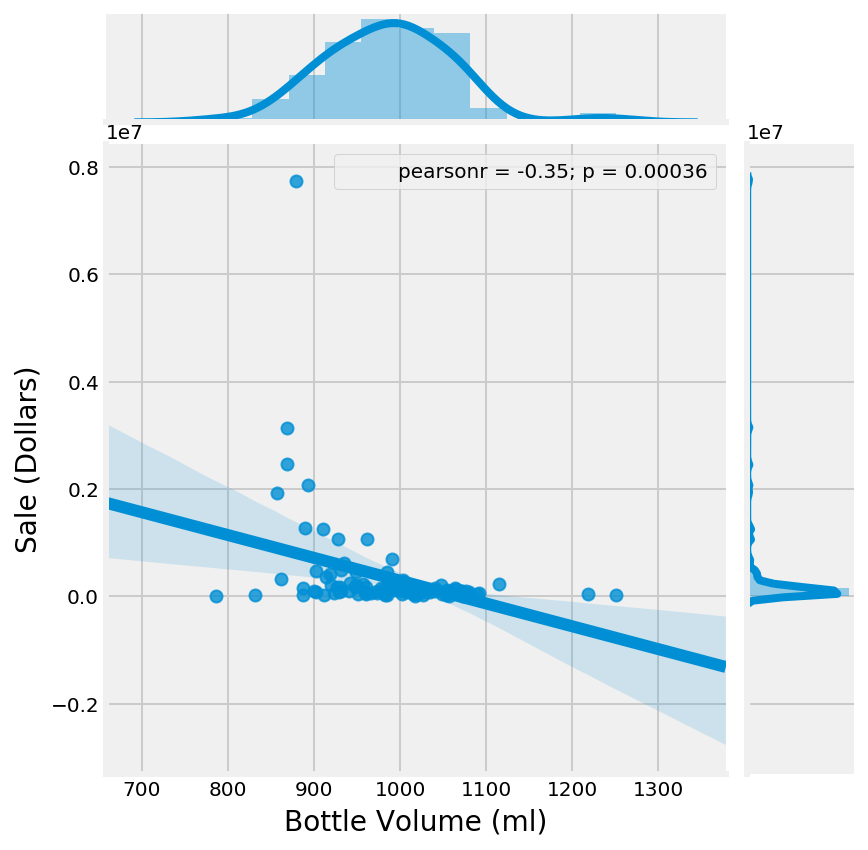

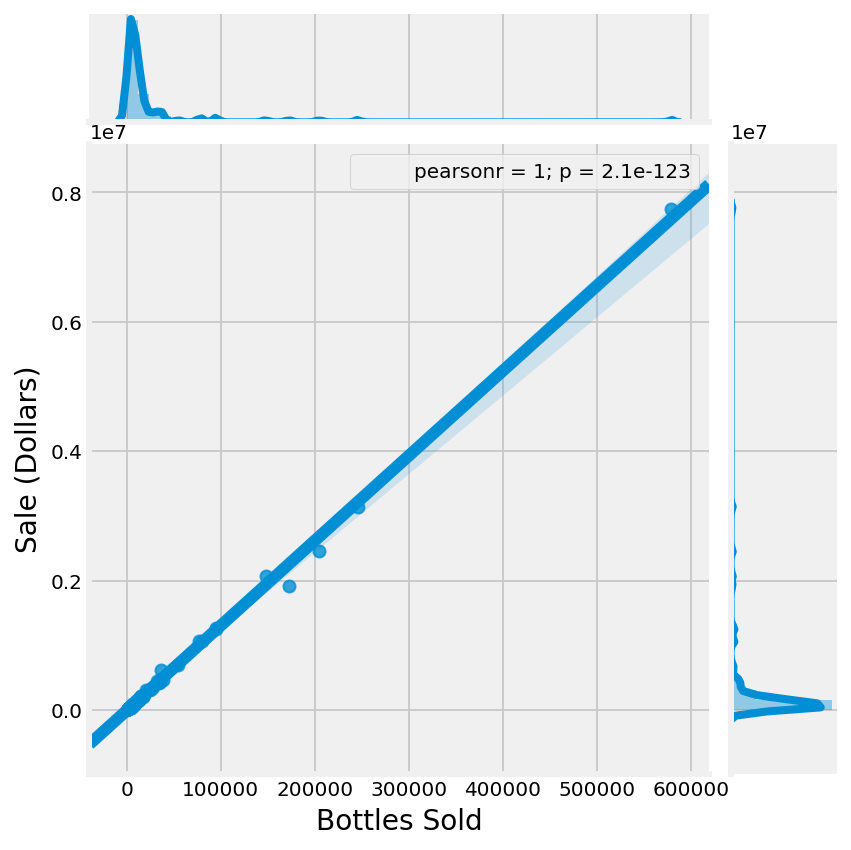

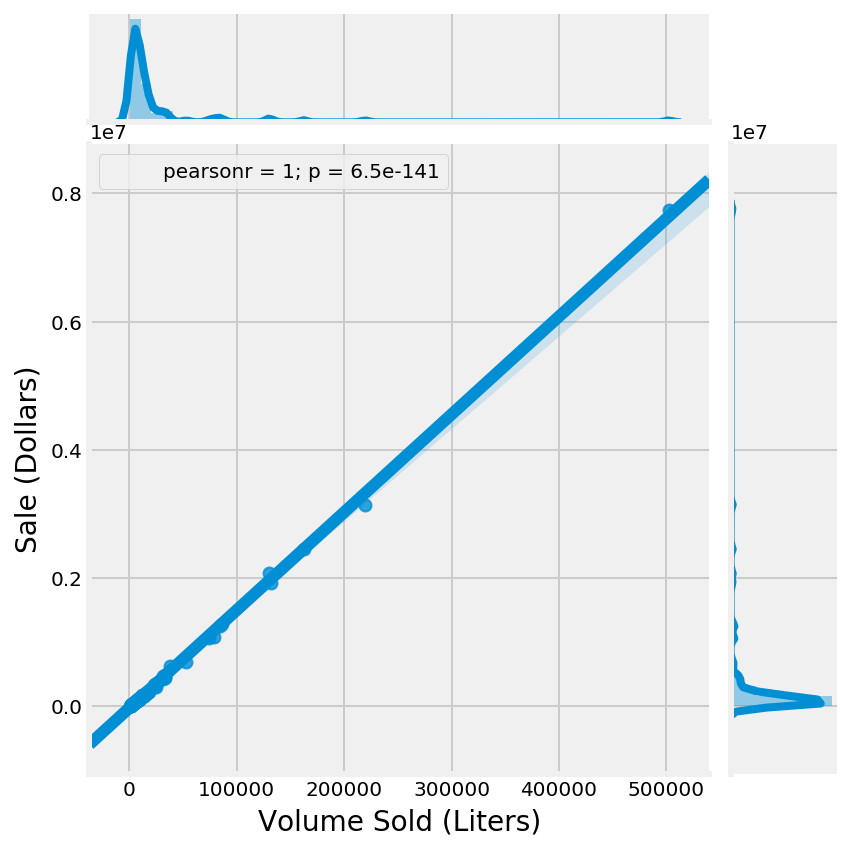

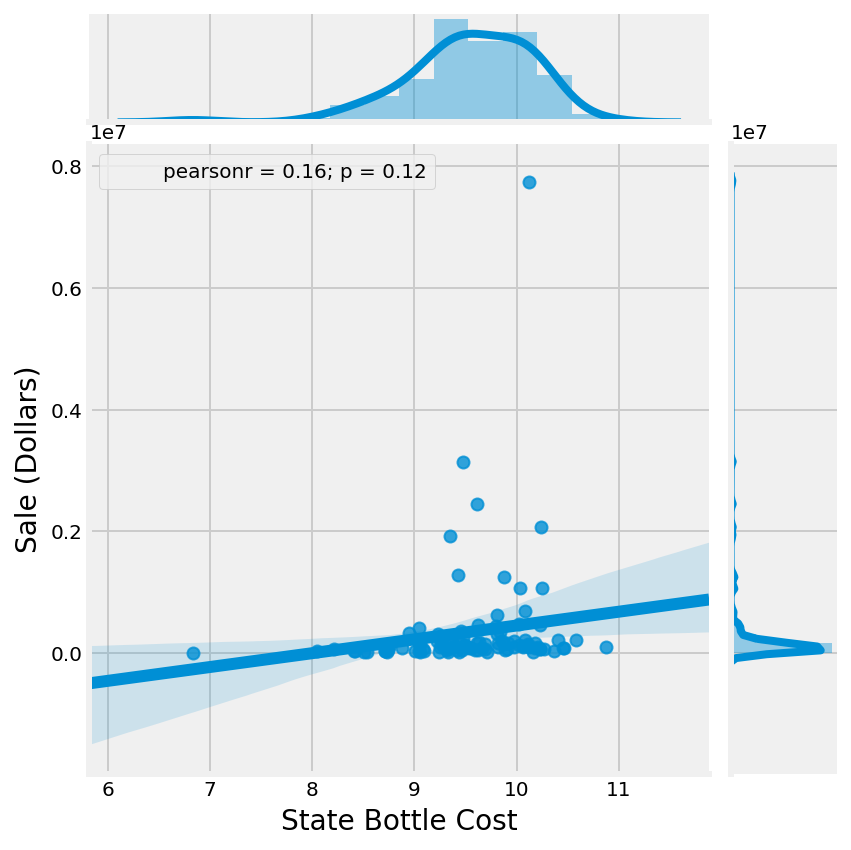

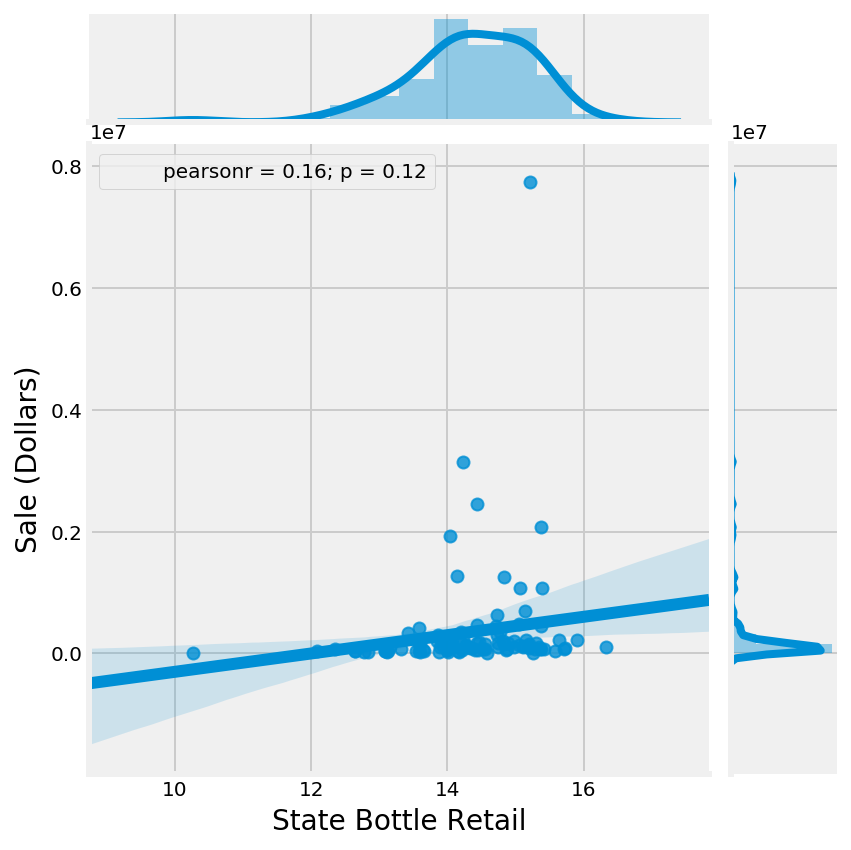

In [15]:
agg_columns = ['Bottle Volume (ml)', 'Bottles Sold', 'Volume Sold (Liters)', 
               'State Bottle Cost', 'State Bottle Retail']

for i in agg_columns:
    sns.jointplot(aggs[i], aggs['Sale (Dollars)'], kind = 'reg')
    plt.xlabel(f'{i}',fontsize=14)
    plt.ylabel('Sale (Dollars)',fontsize=14)
    plt.show();
    print

#### _Feature Selection - Preparing For Model Building _
- Correlation heat maps leverage a pair-wise correlation matrix depicted as varying shades to investigate all relationships for all variables and communicate relationships via color rather than standard spreadsheet form. 
- Below, the correaltion heat map also displays numerical coefficient to provide more clarity for feature selection. 
- The following features will be used in modelling (shown in dark blue and tan) : 
     - Bottles Sold
     - Volume Sold (Liters)

Text(0.5,1,'Correlation Heat Map')

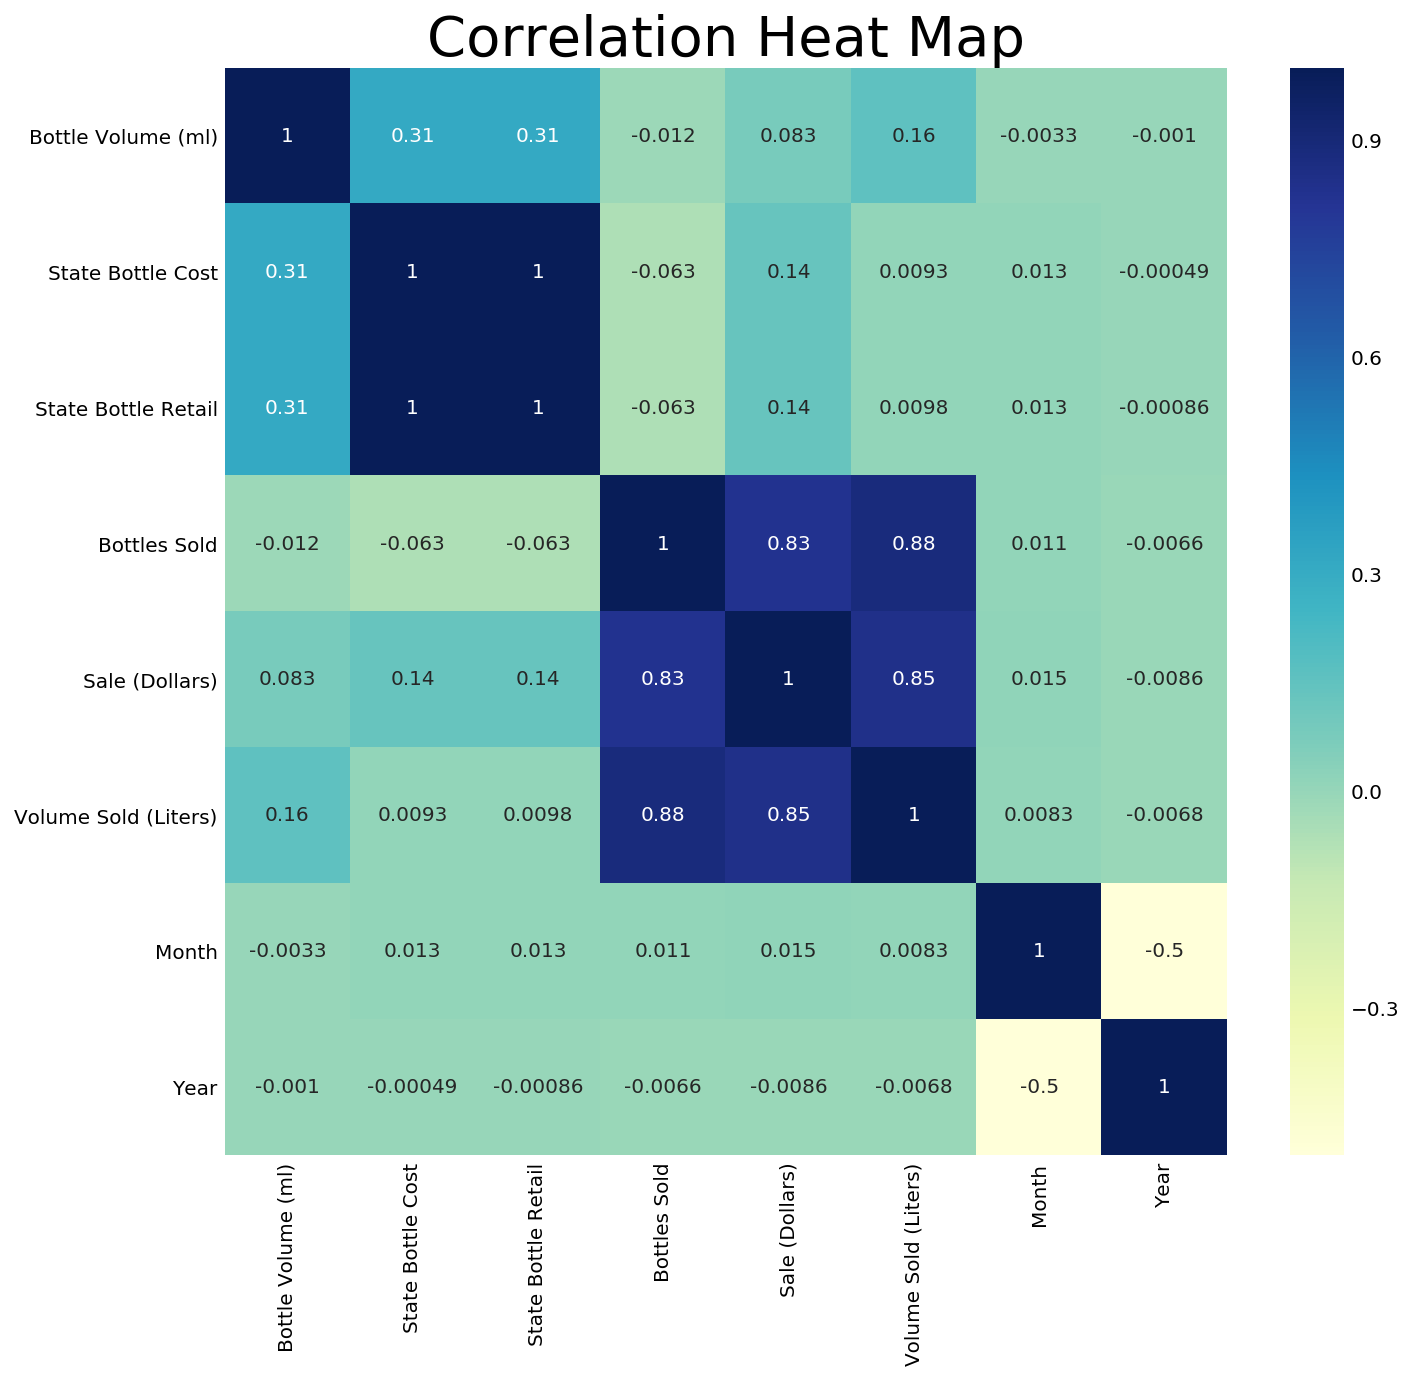

In [16]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap="YlGnBu")
plt.title('Correlation Heat Map',fontsize=28)

#### _Dummy Variable Creation - Transforming `County` Into Indicator Variable_
- A dummy variable, or indicator variable, is an artificial variable created to represent an attribute with two or more distinct categories
- Below, a dummy variable is created for County - producing a binary variable column representing each individual county to be added to the feature matrix and serve as the location indicator: 

In [17]:
# Dummy Variable for County  

county_dummy = pd.get_dummies(df['County'])
county_dummy

,Adair,Adams,Allamakee,Appanoose,Audubon,Benton,Black Hawk,Boone,Bremer,Buchanan,...,Wapello,Warren,Washington,Wayne,Webster,Winnebago,Winneshiek,Woodbury,Worth,Wright
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


- Before applying machine learning algorithms to our data, a feature matrix comprised of the columns selected from the correlation heat map and the county dummy variable must be created to be utilized as our dependent variables, with the independent (target) variable we are predicting being Sales. 

#### _Creating Feature Matrix_

In [18]:
# Features from heatmap 
corr_features = df[['State Bottle Retail','Bottles Sold', 
                    'Sale (Dollars)','Volume Sold (Liters)']]

# County Dummy Variable  
county_dummy = pd.get_dummies(df['County'])

# Combine
feature_matrix = pd.concat([corr_features, county_dummy],axis=1)

In [19]:
# Inspecting progress

feature_matrix

,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Adair,Adams,Allamakee,Appanoose,Audubon,Benton,...,Wapello,Warren,Washington,Wayne,Webster,Winnebago,Winneshiek,Woodbury,Worth,Wright
0,6.75,12,81.00,9.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,20.63,2,41.26,1.50,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,18.89,24,453.36,24.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,14.25,6,85.50,10.50,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,10.80,12,129.60,21.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,19.98,6,119.88,10.50,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,9.99,3,29.97,2.25,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,23.63,2,47.26,3.50,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,17.24,4,68.96,3.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,11.43,2,22.86,2.00,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


## Step 3 : Model Building 
- The model building process centers around determining what features result in the highest predicted sales, as well as which location (County) the highest predicted sales will occur in in order to offer recommenndations for the store owner 

## Linear Regression using Stats Models
- Our first model will utilize one of the most basic yet effective approaches in data science - linear regression - via the Stats Models library.
- `Note`, beware of the "dummy variable trap" by excluding one county from the feature matrix to serve as a baseline from which to compare model performance. 

In [38]:
# Setting dependent and independent variables 
x = feature_matrix.drop(['Adams','Sale (Dollars)'], axis=1)
y = feature_matrix['Sale (Dollars)']


# Adding constant aka y-intercept
x = sm.add_constant(x)                

# Instantiating model 
stats_model = sm.OLS(y,x).fit()

# Making predictions
stats_predictions = stats_model.predict(x)  

# Printing summary 
stats_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Sale (Dollars)   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     8838.
Date:                Fri, 22 Jun 2018   Prob (F-statistic):               0.00
Time:                        00:17:02   Log-Likelihood:            -1.7868e+06
No. Observations:              269223   AIC:                         3.574e+06
Df Residuals:                  269121   BIC:                         3.575e+06
Df Model:                         101                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  -86.7683     12.078     -7.184      0.000    -110.441     -63.095
State Bottle Retail      5.6774      0.034    166.194      0.000       5.610       5.744
Bottles Sold             6.4463      0.032    200.394      0.000       6.383       6.509
Volume Sold (Liters)     6.4451      0.027    242.000      0.000       6.393       6.497
Adair                    3.0344     14.285      0.212      0.832     -24.963      31.032
Allamakee                2.0033     13.351      0.150      0.881     -24.164      28.170
Appanoose               -0.2429     13.355     -0.018      0.985     -26.419      25.933
Audubon                  2.0060     17.196      0.117      0.907     -31.698      35.710
Benton                   1.8344     13.433      0.137      0.891     -24.494      28.163
Black Hawk               4.7800     12.161      0.393      0.694     -19.055      28.615
Boone                    7.3663     12.720      0.579      0.563     -17.564      32.297
Bremer                   4.2601     12.681      0.336      0.737     -20.595      29.115
Buchanan                 4.7060     12.918      0.364      0.716     -20.613      30.025
Buena Vista              3.5516     12.572      0.283      0.778     -21.089      28.192
Butler                   1.4015     15.178      0.092      0.926     -28.347      31.150
Calhoun                  8.8417     15.032      0.588      0.556     -20.621      38.305
Carroll                 16.3353     12.784      1.278      0.201      -8.722      41.393
Cass                     4.2368     13.200      0.321      0.748     -21.635      30.108
Cedar                   10.4538     13.341      0.784      0.433     -15.693      36.601
Cerro Gordo              1.4206     12.287      0.116      0.908     -22.661      25.502
Cherokee                -2.9030     13.583     -0.214      0.831     -29.526      23.720
Chickasaw                4.4385     14.800      0.300      0.764     -24.569      33.446
Clarke                  13.8423     13.954      0.992      0.321     -13.506      41.191
Clay                     1.6926     12.782      0.132      0.895     -23.360      26.745
Clayton                  1.9896     13.140      0.151      0.880     -23.765      27.744
Clinton                  8.9703     12.456      0.720      0.471     -15.444      33.384
Crawford                -1.4220     13.270     -0.107      0.915     -27.430      24.587
Dallas                  57.9300     12.578      4.606      0.000      33.277      82.583
Davis                    5.3698     17.704      0.303      0.762     -29.330      40.070
Decatur                  8.9076     17.274      0.516      0.606     -24.950      42.765
Delaware                 5.3048     13.941      0.381      0.704     -22.019      32.629
Des Moines               9.0166     12.408      0.727    

## Interpreting OLS Regression Results

### _ R-squared = 0.768_
- 76.8% of variance in the data explained by the model 

### _State Bottle Retail Coefficient = 5.6774_
- For every additional dollar increase in state bottle retail cost, sales increase by 5.68 dollars

### _Bottles Sold Coefficient = 6.4463_
- For every additional bottle sold, sales increase by 6.44 dollars

### _Volume Sold (Liters) Coefficent = 6.4451_
- For every additional Liter sold, ssles increase by 6.44

### _County Dummy Variable Coefficients _  
- Storing County names and their respective coefficients as a dictionary to investigate what counties' Sales increase the most

In [40]:
# Storing keys (County names) and values (model params aka coefficients) as lists
keys = x.columns.tolist()
values = stats_model.params.tolist()

# Zipping key-value pairs together 
zipped = zip(keys, values)

# Mapping lambda function to dictionary to apply county model coefficent to county name 
# Sorting results in descending order
# Indexing to grab top 3 coefficients 
print('Top 3 Counties:')
print('=============================================')
sorted(zipped, key=lambda x: x[1],reverse=True)[:3]

Top 3 Counties:


[('Dallas', 57.930033253140984),
 ('Johnson', 21.54513538375294),
 ('Pottawattamie', 18.614708910960562)]

### Investigating High Performing Stores in Top 3 Counties 
- Creating subsetted dataframes for the top counties identified by the linear regression above in order to investigate the highest performing stores in each. 
- Like earlier in this notebook, aggregate functions will be utilized to group data together, this time on the Store Number column.

In [22]:
# Subsetting dataframe for top 3 counties 
dallas = df[df['County']=='Dallas']
johnson = df[df['County']=='Johnson']
pottawattamie = df[df['County']=='Pottawattamie']

In [41]:
# Creating aggregate functions for each subsetted dataframe 
# Grouping aggregate functions by Store Number column


# Dallas  
dallas_aggs = {'Bottle Volume (ml)':'mean','State Bottle Cost':'mean','State Bottle Retail'
              :'mean','Bottles Sold':'sum','Sale (Dollars)':'sum','Volume Sold (Liters)':'sum','Store Number':'count'}
dallas_aggs = dallas.groupby('Store Number').agg(dallas_aggs)


# Johnson  
johnson_aggs = {'Bottle Volume (ml)':'mean','State Bottle Cost':'mean','State Bottle Retail'
              :'mean','Bottles Sold':'sum','Sale (Dollars)':'sum','Volume Sold (Liters)':'sum','Store Number':'count'}
johnson_aggs = johnson.groupby('Store Number').agg(johnson_aggs)


# Pottawattamie 
pottawattamie_aggs = {'Bottle Volume (ml)':'mean','State Bottle Cost':'mean','State Bottle Retail'
              :'mean','Bottles Sold':'sum','Sale (Dollars)':'sum','Volume Sold (Liters)':'sum','Store Number':'count'}
pottawattamie_aggs = pottawattamie.groupby('Store Number').agg(pottawattamie_aggs)

In [42]:
# Sorting aggregate functions in descending order to identify 5 highest performing stores 

# Dallas 
top_stores_dallas = dallas_aggs.sort_values('Sale (Dollars)',ascending=False).head(5)

# Johnson 
top_stores_johnson = johnson_aggs.sort_values('Sale (Dollars)',ascending=False).head(5)

# Pottawattamie
top_stores_pottawattamie = pottawattamie_aggs.sort_values('Sale (Dollars)',ascending=False).head(5)

(array([     0.,  50000., 100000., 150000., 200000., 250000., 300000.,
        350000.]), <a list of 8 Text yticklabel objects>)

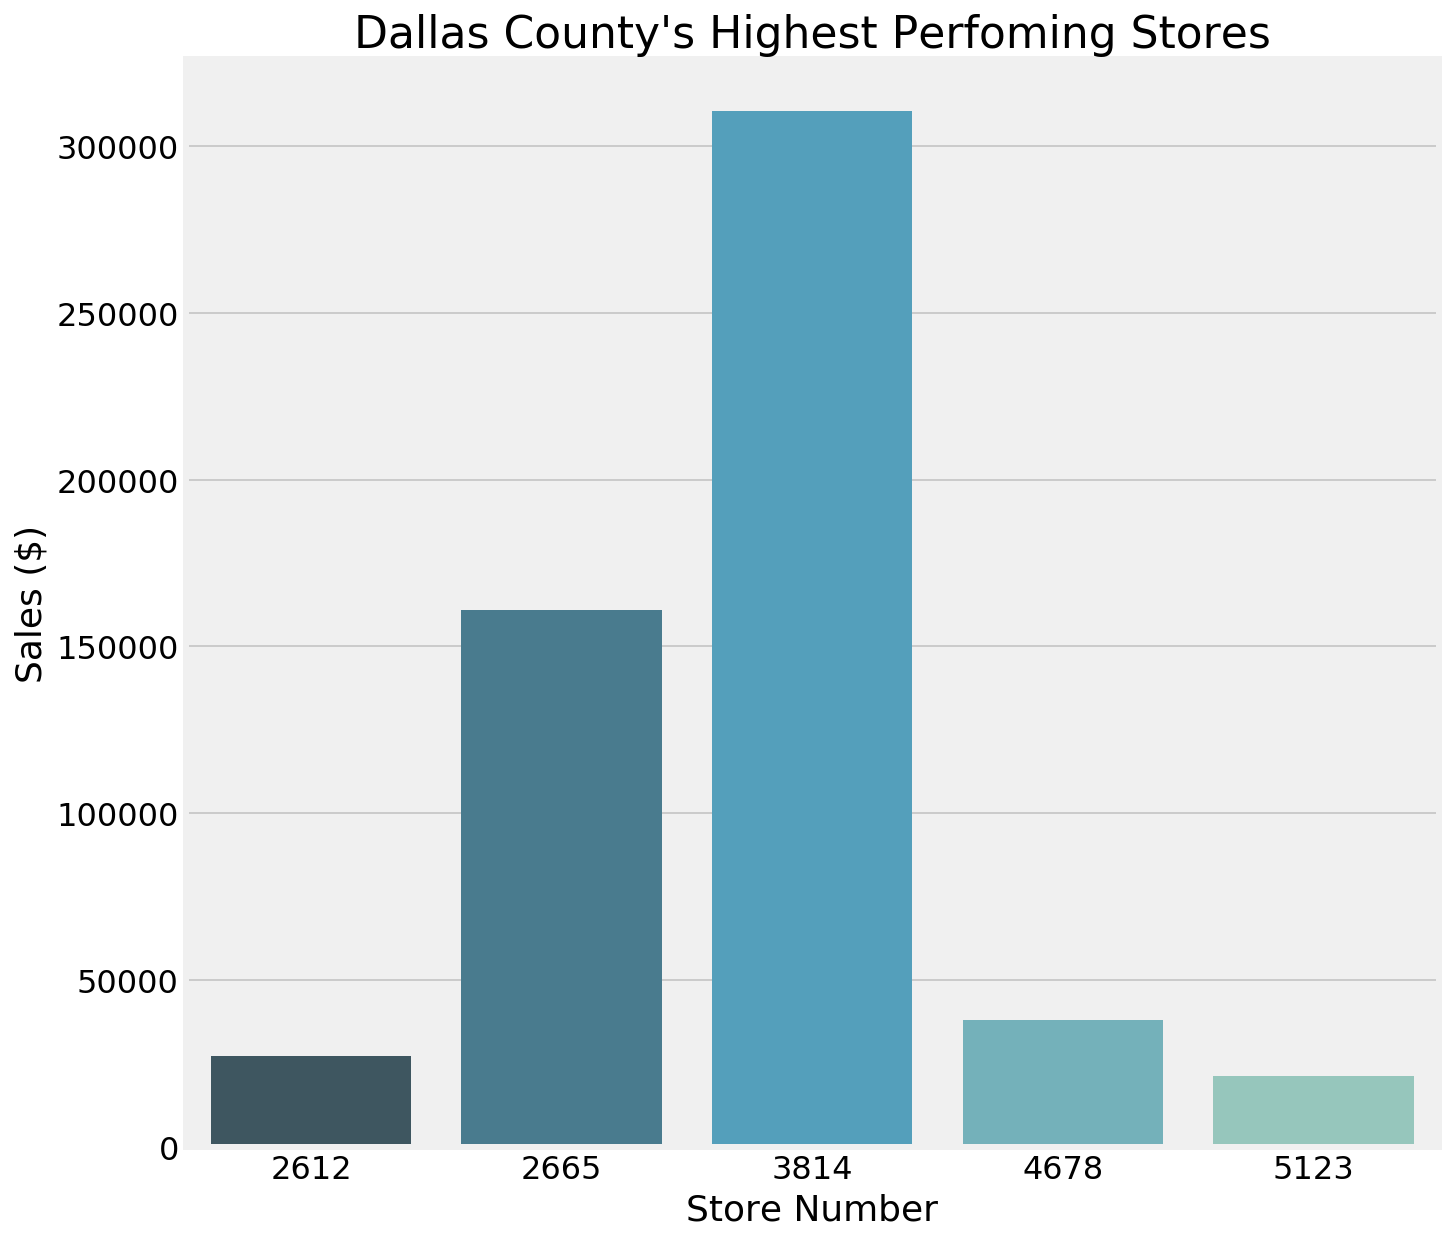

In [43]:
# Visualization

# Dallas

x = top_stores_dallas['Sale (Dollars)'].index
y = top_stores_dallas['Sale (Dollars)'].values

plt.figure(figsize=(10,10))
sns.barplot(x=x,y=y,palette='GnBu_d')
plt.title("Dallas County's Highest Perfoming Stores",fontsize=22)
plt.xlabel("Store Number",fontsize=18)
plt.ylabel("Sales ($)",fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

(array([     0., 100000., 200000., 300000., 400000., 500000., 600000.]),
 <a list of 7 Text yticklabel objects>)

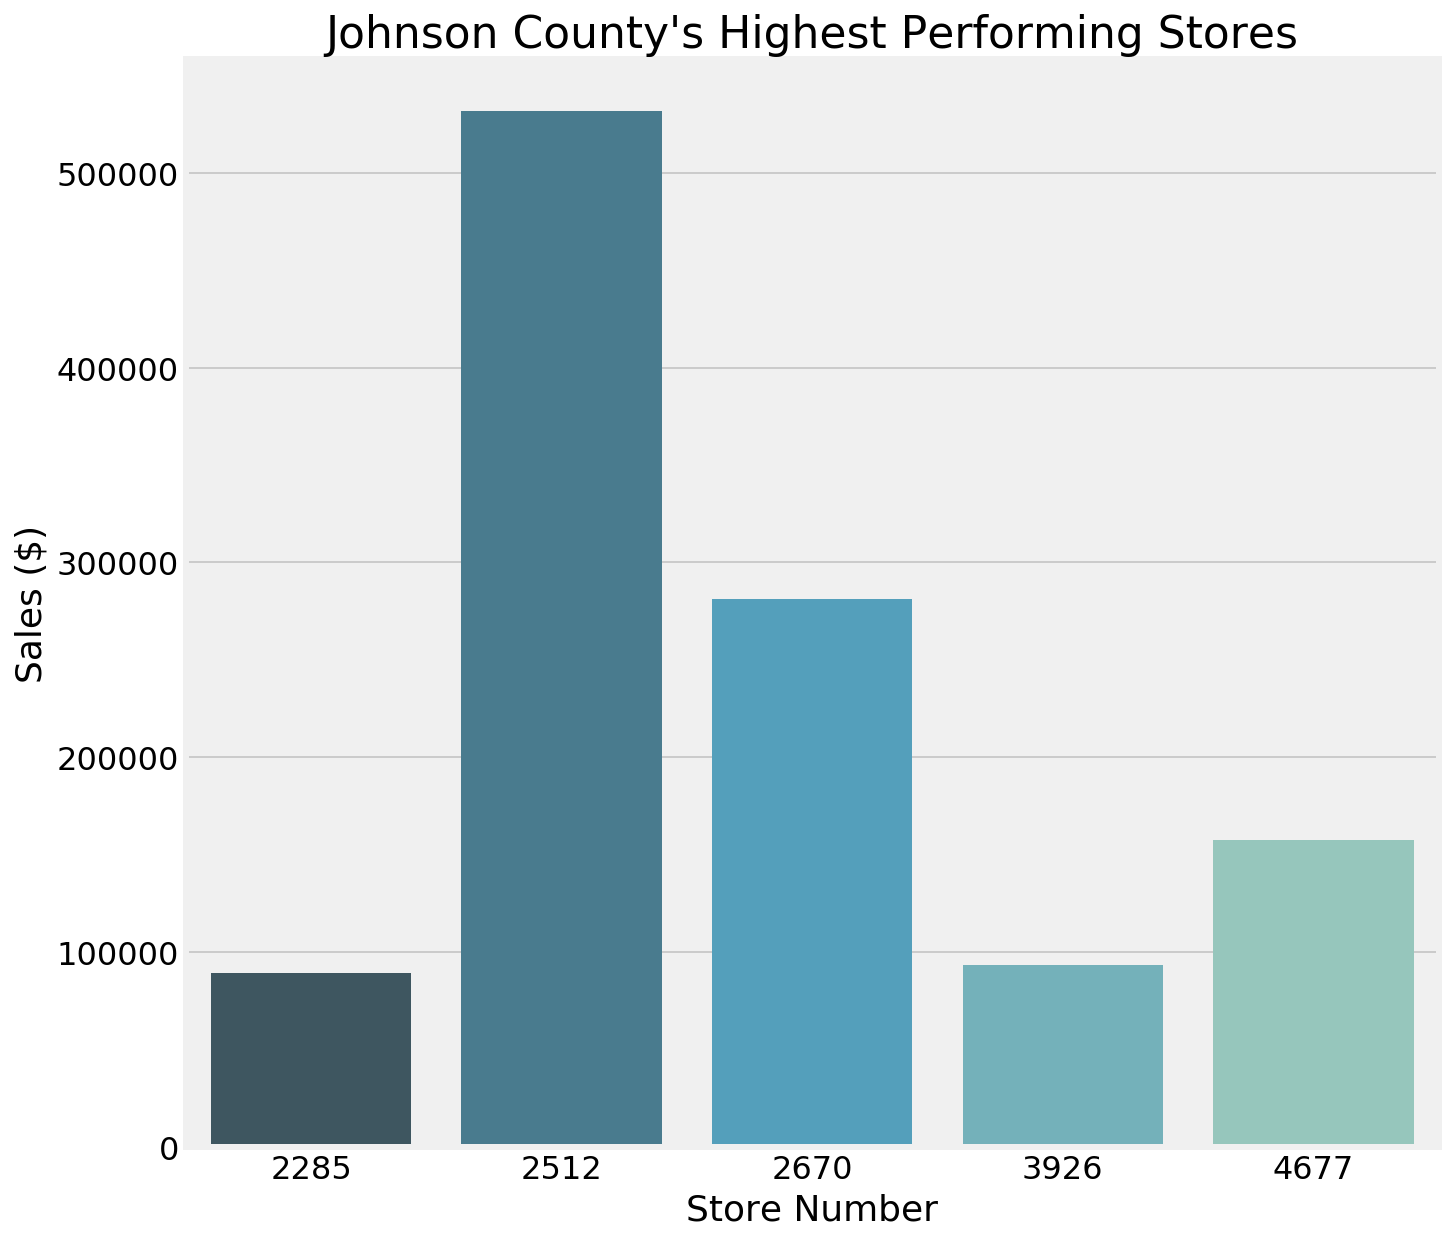

In [44]:
# Johnson 

x = top_stores_johnson['Sale (Dollars)'].index
y = top_stores_johnson['Sale (Dollars)'].values

plt.figure(figsize=(10,10))
sns.barplot(x=x,y=y,palette='GnBu_d')
plt.title("Johnson County's Highest Performing Stores",fontsize=22)
plt.xlabel("Store Number",fontsize=18)
plt.ylabel("Sales ($)",fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

(array([     0.,  50000., 100000., 150000., 200000., 250000.]),
 <a list of 6 Text yticklabel objects>)

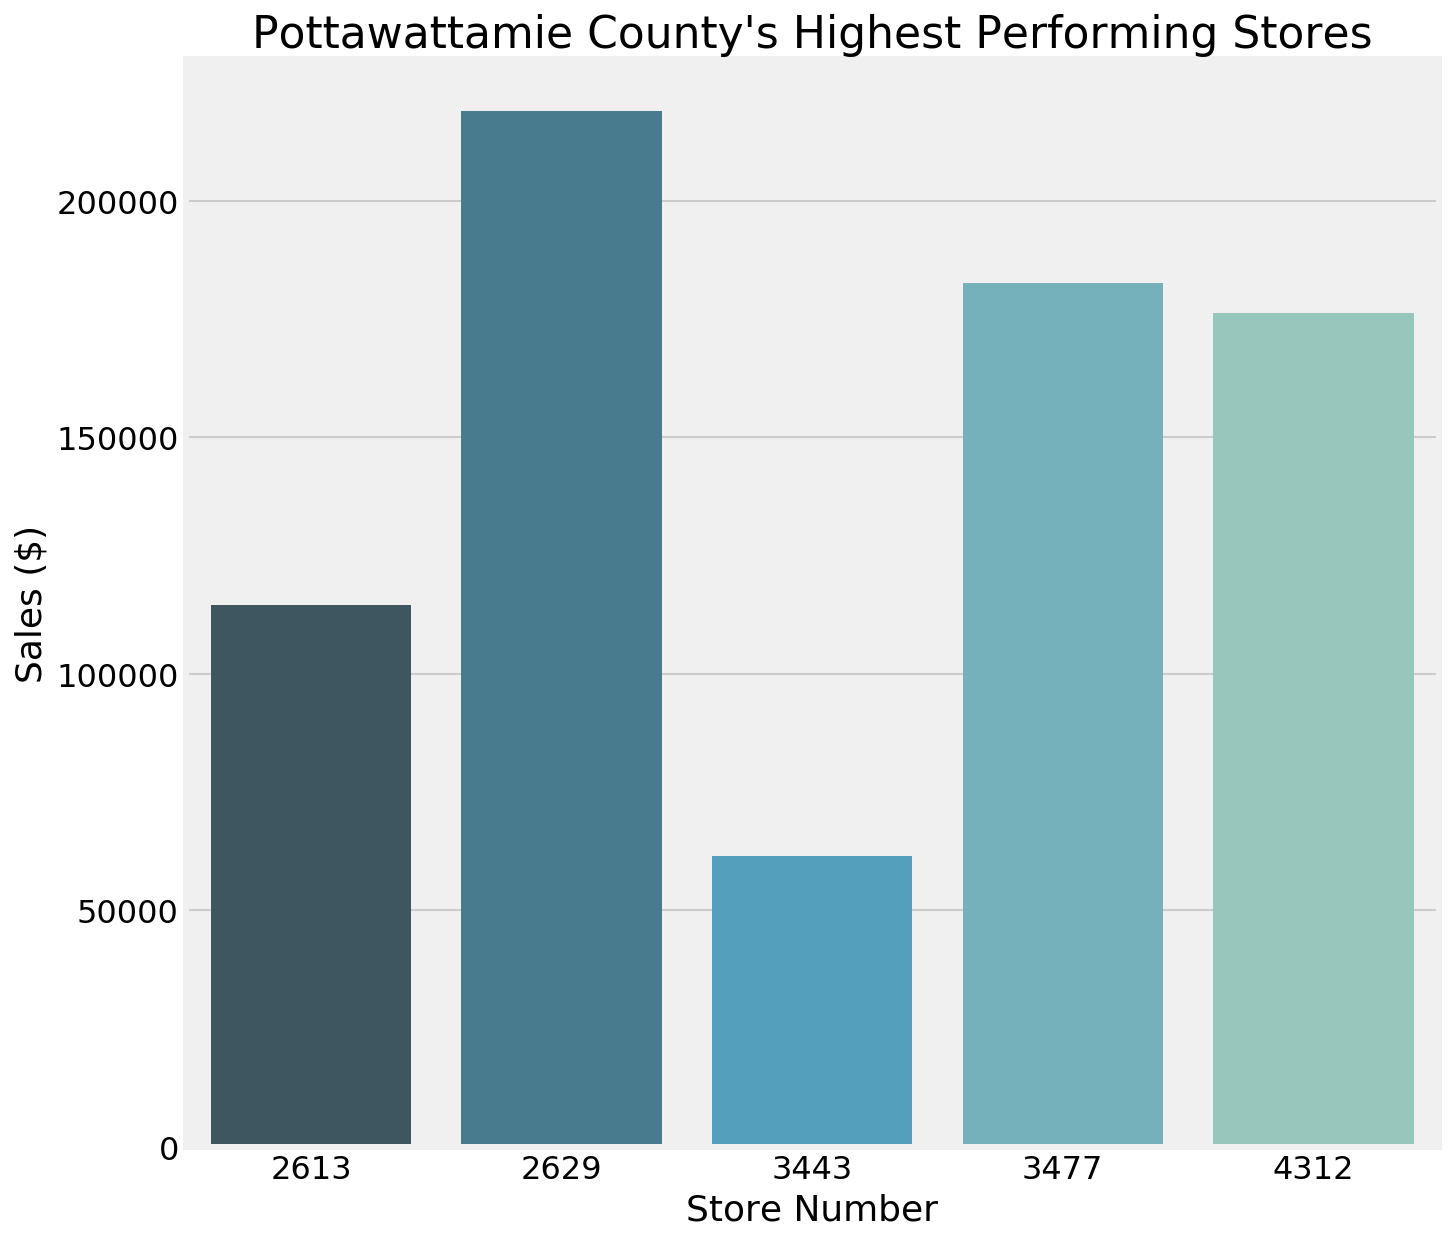

In [45]:
# Pottawattamie 

x = top_stores_pottawattamie['Sale (Dollars)'].index
y = top_stores_pottawattamie['Sale (Dollars)'].values

plt.figure(figsize=(10,10))
sns.barplot(x=x,y=y,palette='GnBu_d')
plt.title("Pottawattamie County's Highest Performing Stores",fontsize=22)
plt.xlabel("Store Number",fontsize=18)
plt.ylabel("Sales ($)",fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

### Linear Regression using Sk-Learn
- Our second model will utilize linear regression exploring a different library - Sci-kit Learn 

In [46]:
# Setting dependent and independent variables 
X = feature_matrix.drop(['Sale (Dollars)','Adams'],axis=1) # Dropping target and baseline county
y = feature_matrix['Sale (Dollars)']

# Splitting data into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Instantiating model 
lm = linear_model.LinearRegression()

# Fitting model on training data 
lm.fit(X_train, y_train)                   # Training model 

# Making predicitons on testing data 
lm_predictions = lm.predict(X_test)           

# Scoring model 
accuracy = lm.score(X_test,y_test)         

# Printing score
print('Accuracy Score: ', lm.score(X_test, y_test))

Accuracy Score:  0.7560946200596085


### _ Accessing Model Coefficients_
- Again, transforming coefficients and their respective features into a dictionary allows us to access the 3 counties whose sales increase the most

In [47]:
# Empty dictionary to append results to 
coef_dict = {}

# For loop mapping each coefficient to each feature in training data 
for coef, feat in zip(lm.coef_, X_train):
    coef_dict[feat] = coef

# Sorting and indexing dictionary to access top 3 counties 
sorted(coef_dict, key=coef_dict.get, reverse=True)[:3]

['Dallas', 'Carroll', 'Johnson']

## Interpreting Sk-Learn Results

### _ R-squared = 0.756_
- 75.6% of variance in the data explained by the model 

### _Model Coefficients_
- 2 of the 3 same counties (Dallas and Johnson) identified using stats models included in this model 

## Step 4: Plotting Results

### _Stats Models _

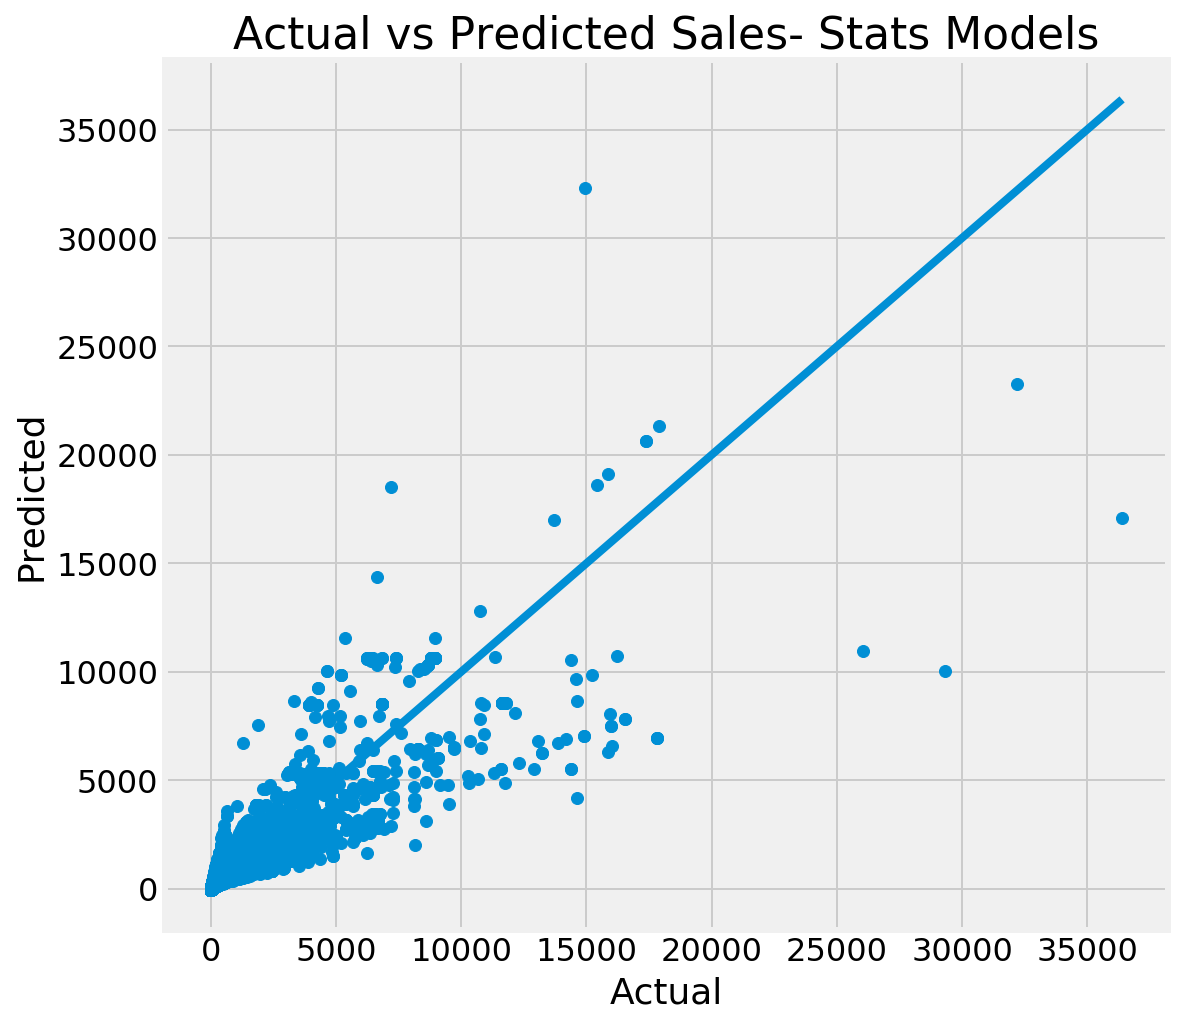

In [52]:
plt.figure(figsize=(8,8))
plt.scatter(y, stats_predictions)
plt.title('Actual vs Predicted Sales- Stats Models',fontsize=22)
plt.xlabel('Actual',fontsize=18)
plt.ylabel('Predicted',fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.plot([min(y), max(y)], [min(y), max(y)], '-')

### _Sk-Learn _

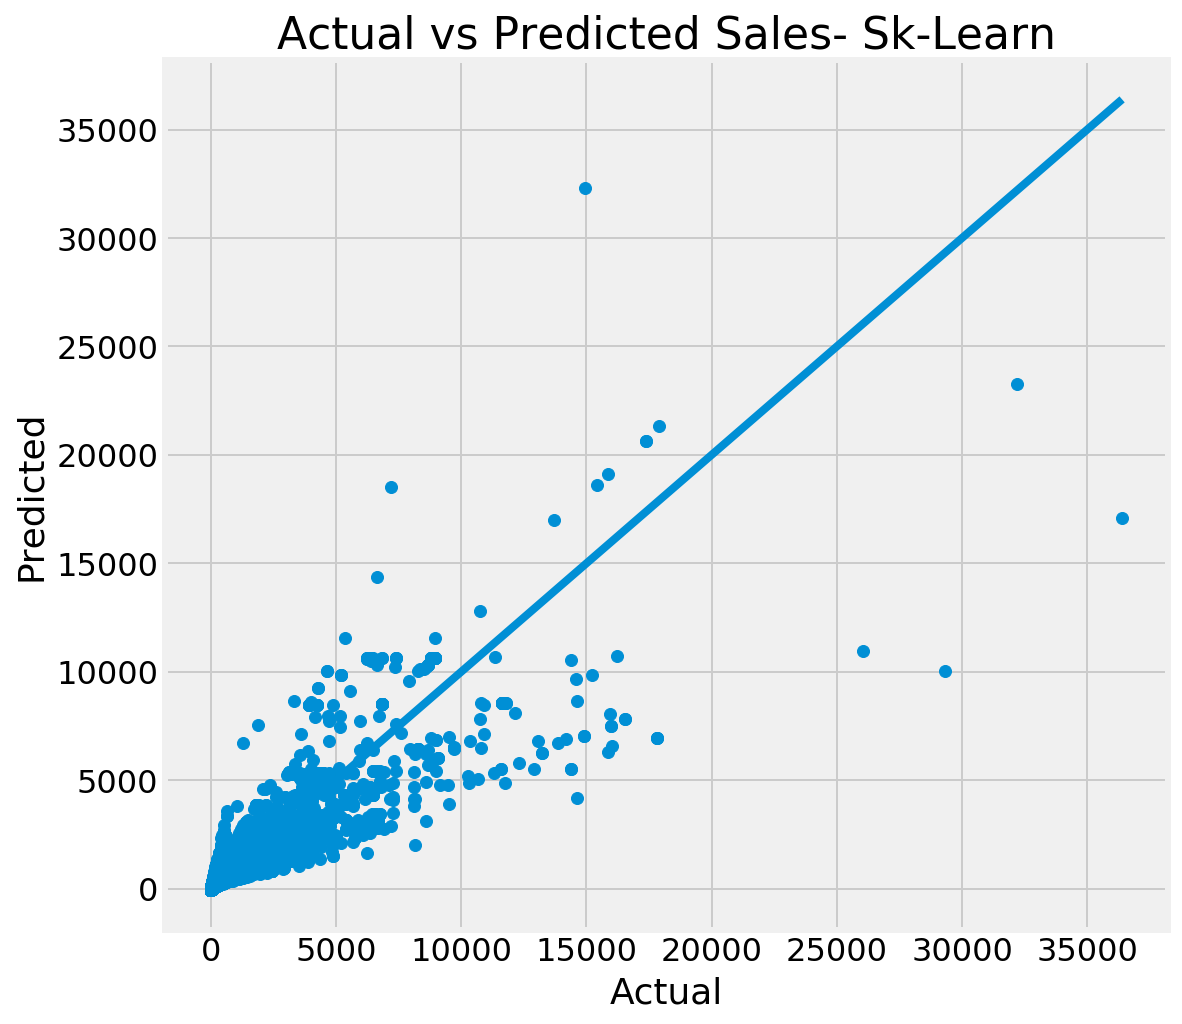

In [53]:
plt.figure(figsize=(8,8))
plt.scatter(y, stats_predictions)
plt.title('Actual vs Predicted Sales- Sk-Learn',fontsize=22)
plt.xlabel('Actual',fontsize=18)
plt.ylabel('Predicted',fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.plot([min(y), max(y)], [min(y), max(y)], '-')